In [3]:
import numpy as np
import pandas as pd 
import os 
os.chdir('/Users/Abhi/Downloads/')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train=pd.read_csv('train-4.csv')
test=pd.read_csv('test-4.csv')
solution=pd.read_csv('Sample_Submission.csv')

# Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',
				' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',
				' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly

In [4]:
train.shape,test.shape

((105000, 34), (42000, 33))

In [5]:
train.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0          2004             0                 2         High school   
1   1          2005             0                 0  College/University   
2   2          2004             0                 2                 NaN   
3   3          2004             0                 2  College/University   
4   4          2004             0                 2                 NaN   

                       race  father_country  \
0                     White   United-States   
1                     White           Japan   
2                     White   United-States   
3  Amer/Indian/Aleut/Eskimo   United-States   
4                     White   United-States   

                                  educ  \
0   Associates degree-academic program   
1                             Children   
2           Some college but no degree   
3                 High school graduate   
4                 High school graduate   

                               house_stat                 major_ind_code  \
0                             Householder   Business and repair services   
1   Child <18 never marr not in subfamily    Not in universe or children   
2                    Secondary individual    Manufacturing-durable goods   
3                             Householder                Wholesale trade   
4                             Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code  age  \
0           no   United-States                     Protective services   42   
1          NaN   United-States                                     NaN   10   
2          NaN   United-States   Machine operators assmblrs & inspctrs   46   
3           no   United-States            Handlers equip cleaners etc    35   
4           no   United-States          Executive admin and managerial   61   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [6]:
solution

ID  income
0      105000       0
1      105001       0
2      105002       0
3      105003       0
4      105004       0
5      105005       0
6      105006       0
7      105007       1
8      105008       1
9      105009       1
10     105010       1
11     105011       1
12     105012       1
13     105013       1
14     105014       1
15     105015       1
16     105016       1
17     105017       1
18     105018       1
19     105019       1
20     105020       1
21     105021       1
22     105022       1
23     105023       1
24     105024       1
25     105025       1
26     105026       1
27     105027       1
28     105028       1
29     105029       0
30     105030       0
31     105031       0
32     105032       0
33     105033       0
34     105034       0
35     105035       0
36     105036       0
37     105037       0
38     105038       0
39     105039       0
40     105040       0
41     105041       0
42     105042       0
43     105043       0
44     105044       0
45     105045       0
46     105046       0
47     105047       0
48     105048       0
49     105049       0
50     105050       0
51     105051       0
52     105052       0
53     105053       0
54     105054       0
55     105055       0
56     105056       0
57     105057       0
58     105058       0
59     105059       0
60     105068       0
61     105071       0
62     105076       0
63     105077       0
64     105102       0
65     105103       0
66     105105       0
67     105106       0
68     105109       0
69     105130       0
70     105141       0
71     105162       0
72     105164       0
73     105165       0
74     105167       0
75     105199       0
76     105200       0
77     105212       0
78     105252       0
79     105301       0
80     105302       0
81     105328       0
82     105333       0
83     105340       0
84     105345       0
85     105421       0
86     105428       0
87     105435       0
88     105436       0
89     105456       0
90     105479       0
91     105482       0
92     105491       0
93     105495       0
94     105510       0
95     105511       0
96     105521       0
97     105525       0
98     105535       0
99     105554       0
100    105567       0
101    105570       0
102    105585       0
103    105597       0
104    105627       0
105    105641       0
106    105650       0
107    105680       0
108    105689       0
109    105693       0
110    105721       0
111    105722       0
112    105724       0
113    105731       0
114    105734       0
115    105747       0
116    105750       0
117    105754       0
118    105783       0
119    105793       0
120    105794       0
121    105798       0
122    105803       0
123    105807       0
124    105821       0
125    105824       0
126    105828       0
127    105830       0
128    105832       0
129    105836       0
130    105837       0
131    105854       0
132    105866       0
133    105884       0
134    105889       0
135    105899       0
136    105912       0
137    105917       0
138    105923       0
139    105934       0
140    105936       0
141    105950       0
142    105982       0
143    106008       0
144    106017       0
145    106035       0
146    106038       0
147    106046       0
148    106069       0
149    106073       0
150    106077       0
151    106078       0
152    106094       0
153    106102       0
154    106112       0
155    106128       0
156    106155       0
157    106158       0
158    106159       0
159    106173       0
160    106176       0
161    106181       0
162    106185       0
163    106187       0
164    106192       0
165    106194       0
166    106195       0
167    106224       0
168    106252       0
169    106256       0
170    106259       0
171    106261       0
172    106269       0
173    106270       0
174    106273       0
175    106277       0
176    106285       0
177    106300       0
178    106306       0
179    106315       0
180    106319       0
181    

In [7]:
train.income.value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

In [8]:
a=test[['ID']]


In [9]:
a['income']=1

/var/folders/3_/v3zxr5qs2132z44ltsvfwrb80000gn/T/ipykernel_4761/212740246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['income']=1


In [10]:
#a.to_csv('VolHack_final2.csv',index=False)



In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
combine=pd.concat([train,test],ignore_index=False)


In [13]:
combine.shape

(147000, 34)

In [14]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147000 entries, 0 to 41999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147000 non-null  int64  
 1   year_of_poll        147000 non-null  int64  
 2   own_self_emp        147000 non-null  int64  
 3   veteran benefits    147000 non-null  int64  
 4   currently_enrolled  102944 non-null  object 
 5   race                147000 non-null  object 
 6   father_country      147000 non-null  object 
 7   educ                147000 non-null  object 
 8   house_stat          146986 non-null  object 
 9   major_ind_code      147000 non-null  object 
 10  labour_union        97332 non-null   object 
 11  self_country        147000 non-null  object 
 12  major_occ_code      72877 non-null   object 
 13  age                 146404 non-null  float64
 14  mother_country      147000 non-null  object 
 15  house_summary       147000 non-null

In [15]:
combine.describe()



ID   year_of_poll   own_self_emp  veteran benefits  \
count  147000.000000  147000.000000  147000.000000     147000.000000   
mean    74280.834422    2004.500769       0.175231          1.516245   
std     43441.017970       0.500001       0.553440          0.850610   
min         0.000000    2004.000000       0.000000          0.000000   
25%     36749.750000    2004.000000       0.000000          2.000000   
50%     73499.500000    2005.000000       0.000000          2.000000   
75%    111775.250000    2005.000000       0.000000          2.000000   
max    149999.000000    2005.000000       2.000000          2.000000   

                 age          gains      dividends         losses  \
count  146404.000000  147000.000000  147000.000000  147000.000000   
mean       36.355298     481.866935     240.606735      25.773062   
std        23.366912    5209.413046    2454.715059     188.966103   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.000000       0.000000       0.000000   
50%        35.000000       0.000000       0.000000       0.000000   
75%        52.000000       0.000000       0.000000       0.000000   
max        94.000000  109998.900000  119998.800000    3225.600000   

         employer_of   weeks_worked    hourly_wage  
count  147000.000000  147000.000000  147000.000000  
mean        1.956728      20.935259      93.613646  
std         2.364360      22.047853     459.430822  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         1.000000       7.000000       0.000000  
75%         4.000000      47.000000       0.000000  
max         6.000000      47.000000   16998.300000

In [16]:
combine.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0          2004             0                 2         High school   
1   1          2005             0                 0  College/University   
2   2          2004             0                 2                 NaN   
3   3          2004             0                 2  College/University   
4   4          2004             0                 2                 NaN   

                       race  father_country  \
0                     White   United-States   
1                     White           Japan   
2                     White   United-States   
3  Amer/Indian/Aleut/Eskimo   United-States   
4                     White   United-States   

                                  educ  \
0   Associates degree-academic program   
1                             Children   
2           Some college but no degree   
3                 High school graduate   
4                 High school graduate   

                               house_stat                 major_ind_code  \
0                             Householder   Business and repair services   
1   Child <18 never marr not in subfamily    Not in universe or children   
2                    Secondary individual    Manufacturing-durable goods   
3                             Householder                Wholesale trade   
4                             Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code   age  \
0           no   United-States                     Protective services  42.0   
1          NaN   United-States                                     NaN  10.0   
2          NaN   United-States   Machine operators assmblrs & inspctrs  46.0   
3           no   United-States            Handlers equip cleaners etc   35.0   
4           no   United-States          Executive admin and managerial  61.0   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [17]:
combine.year_of_poll.unique()

array([2004, 2005])

In [18]:
num=combine.select_dtypes(include=np.number).columns

In [19]:
len(num)

11

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

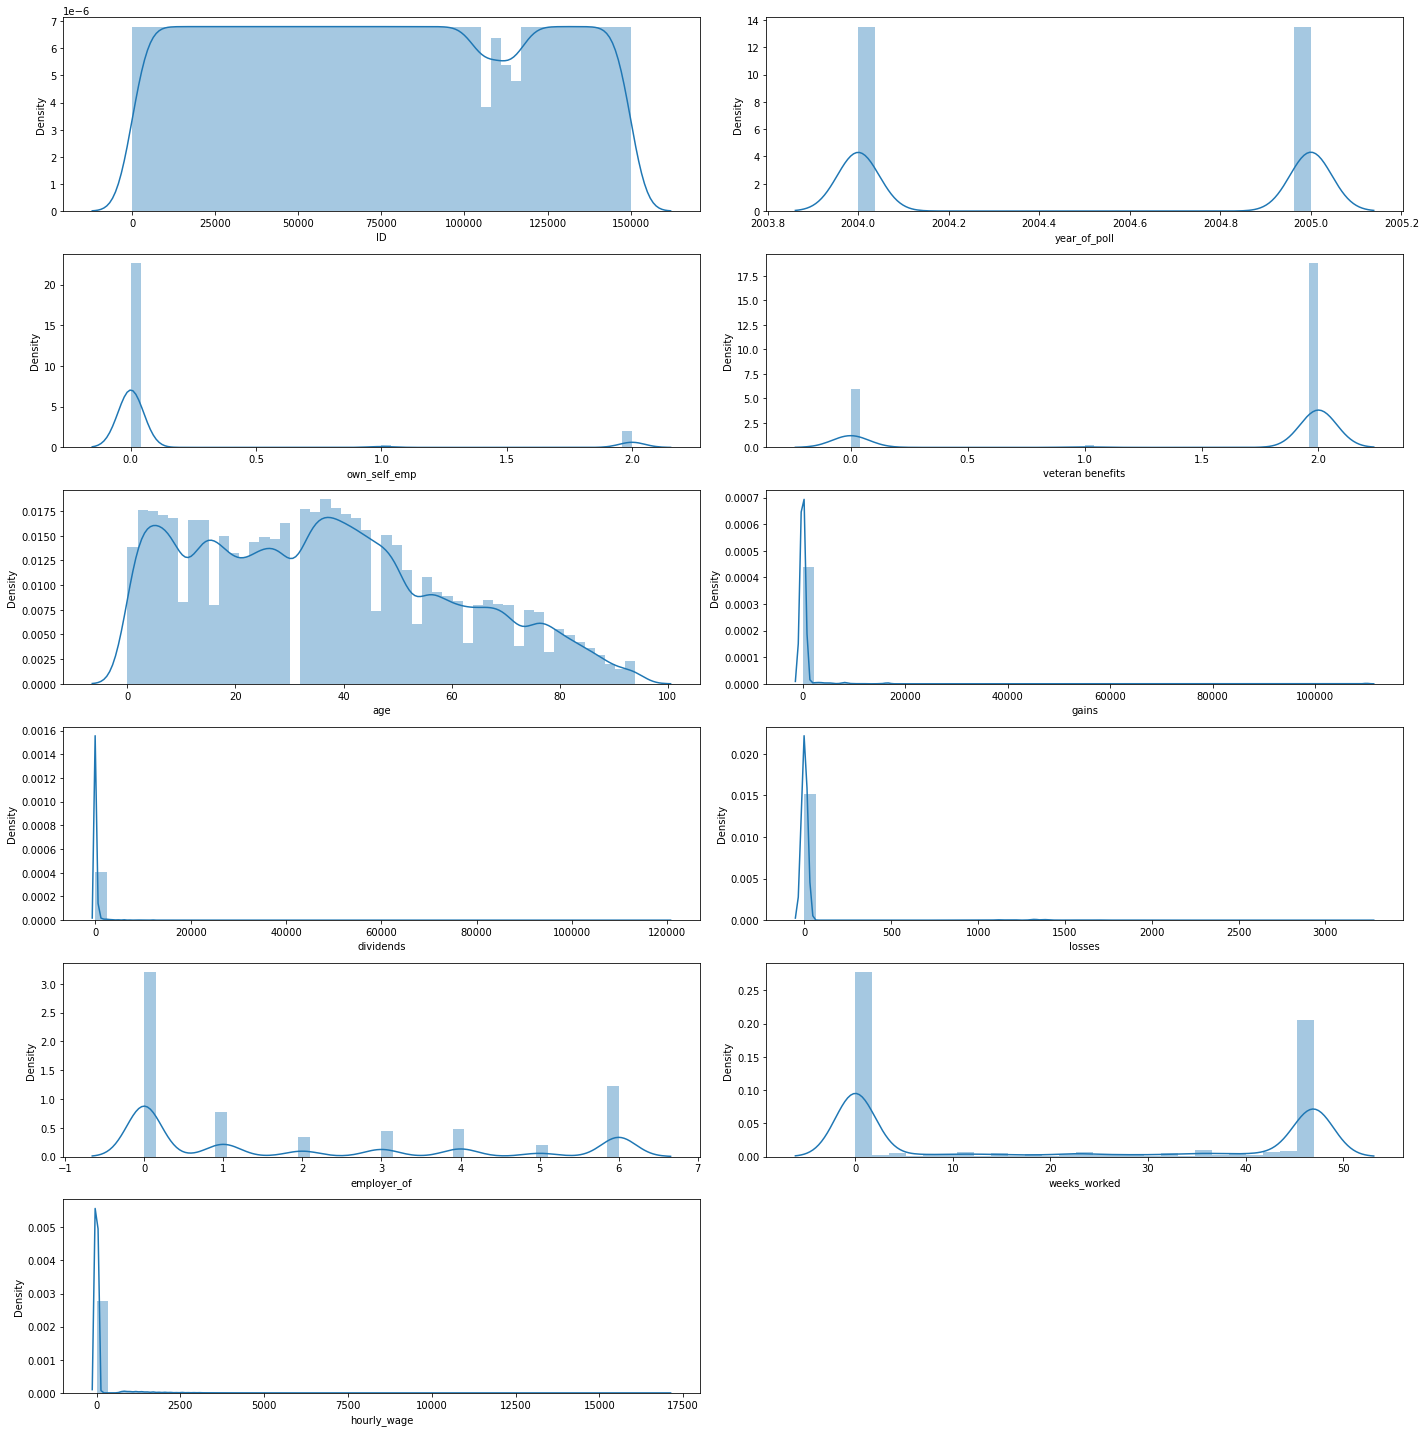

In [21]:

plt.rcParams['figure.figsize']=[20,20]
a=6
b=2
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(combine[i])
    c+=1
    
plt.tight_layout()
plt.show()

# Infrences 
* Own self employed shows that the unemployed people are the most 
* Cadre 2 Benefits that mean 2 has the most of the people 
* people worked  40 to 50 weeks in year and data shows that there are some records in ehich people worked 0
* Divedents and losses are right skewed 
* most of the People are  not employers as the per the data and data shows that few people which have self owned business has 6 employes under 

In [22]:
cat=combine.select_dtypes(exclude=np.number).columns

In [23]:
len(cat)

23

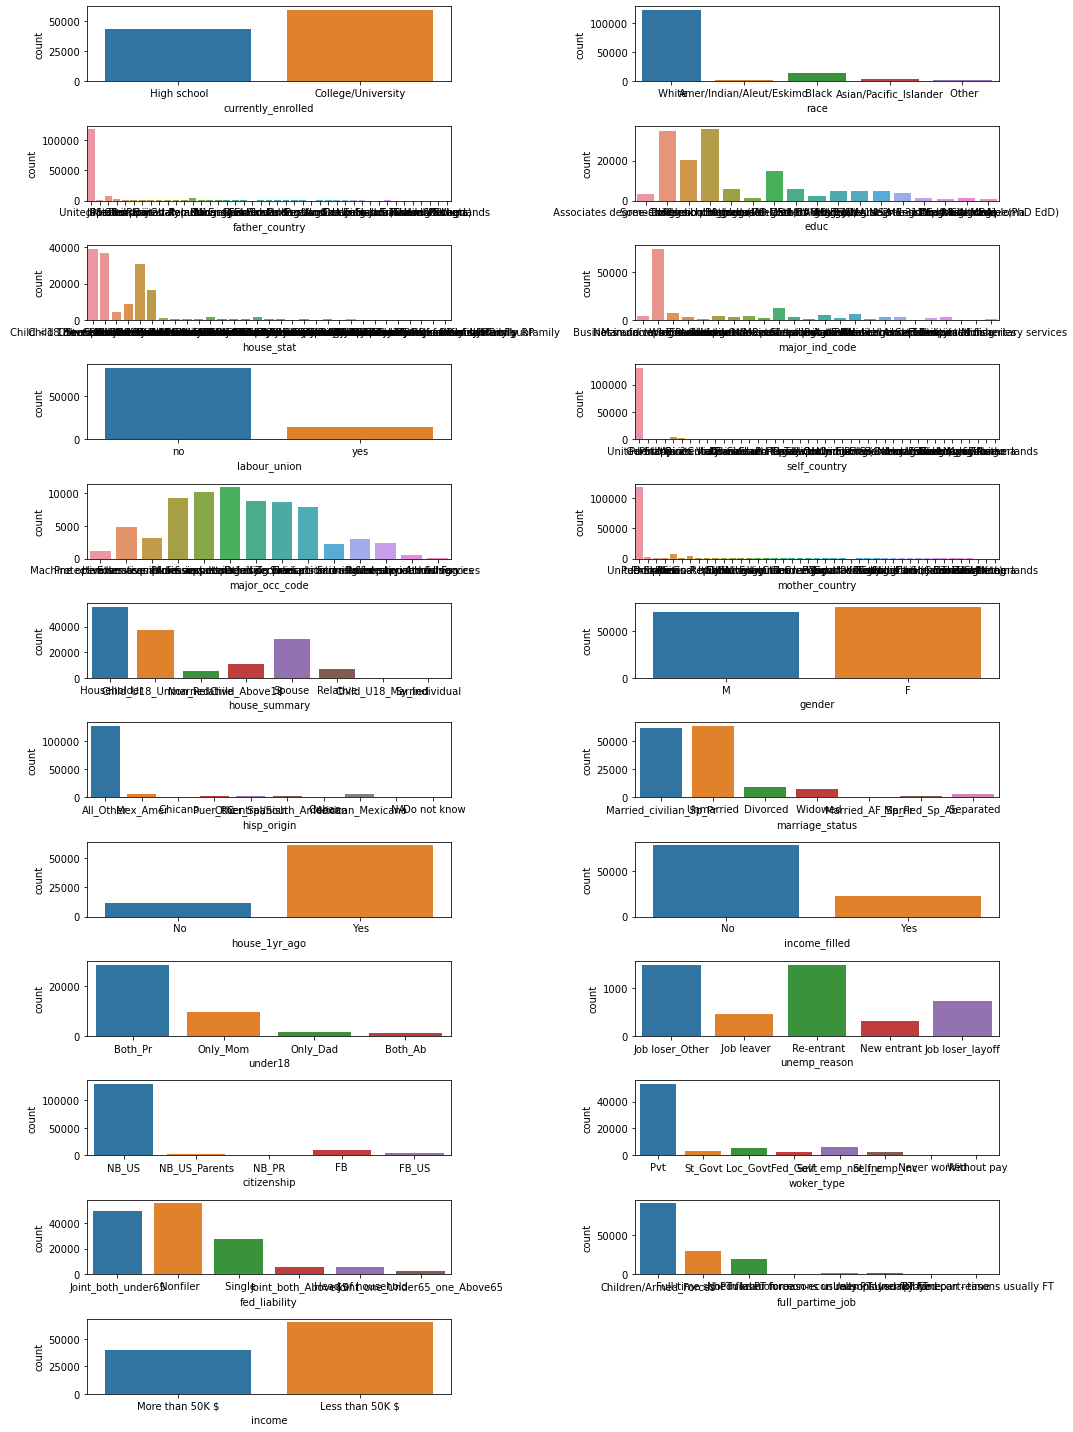

In [24]:
plt.rcParams['figure.figsize']=[15,20]
a=12
b=2
c=1
for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(combine[i])
    c+=1
    
plt.tight_layout()
plt.show()

In [25]:
combine.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0          2004             0                 2         High school   
1   1          2005             0                 0  College/University   
2   2          2004             0                 2                 NaN   
3   3          2004             0                 2  College/University   
4   4          2004             0                 2                 NaN   

                       race  father_country  \
0                     White   United-States   
1                     White           Japan   
2                     White   United-States   
3  Amer/Indian/Aleut/Eskimo   United-States   
4                     White   United-States   

                                  educ  \
0   Associates degree-academic program   
1                             Children   
2           Some college but no degree   
3                 High school graduate   
4                 High school graduate   

                               house_stat                 major_ind_code  \
0                             Householder   Business and repair services   
1   Child <18 never marr not in subfamily    Not in universe or children   
2                    Secondary individual    Manufacturing-durable goods   
3                             Householder                Wholesale trade   
4                             Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code   age  \
0           no   United-States                     Protective services  42.0   
1          NaN   United-States                                     NaN  10.0   
2          NaN   United-States   Machine operators assmblrs & inspctrs  46.0   
3           no   United-States            Handlers equip cleaners etc   35.0   
4           no   United-States          Executive admin and managerial  61.0   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [26]:
combine["currently_enrolled"].value_counts()



College/University    59345
 High school          43599
Name: currently_enrolled, dtype: int64

In [27]:
combine.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     44056
race                       0
father_country             0
educ                       0
house_stat                14
major_ind_code             0
labour_union           49668
self_country               0
major_occ_code         74123
age                      596
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          74720
income_filled          45411
weeks_worked               0
under18               106356
hourly_wage                0
unemp_reason          142526
citizenship                0
woker_type             73812
fed_liability              0
full_partime_job        1960
income                 42000
dtype: int64

In [28]:
combine.currently_enrolled.value_counts()

College/University    59345
 High school          43599
Name: currently_enrolled, dtype: int64

In [29]:
def change(x):
    if x==' High school':
        return 1
    elif x=='College/University':
        return 0
    else:
        return -1
    

In [30]:
combine['currently_enrolled']=combine.currently_enrolled.apply(change)



In [31]:
combine["currently_enrolled"].value_counts()

 0    59345
-1    44056
 1    43599
Name: currently_enrolled, dtype: int64

In [32]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147000 entries, 0 to 41999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147000 non-null  int64  
 1   year_of_poll        147000 non-null  int64  
 2   own_self_emp        147000 non-null  int64  
 3   veteran benefits    147000 non-null  int64  
 4   currently_enrolled  147000 non-null  int64  
 5   race                147000 non-null  object 
 6   father_country      147000 non-null  object 
 7   educ                147000 non-null  object 
 8   house_stat          146986 non-null  object 
 9   major_ind_code      147000 non-null  object 
 10  labour_union        97332 non-null   object 
 11  self_country        147000 non-null  object 
 12  major_occ_code      72877 non-null   object 
 13  age                 146404 non-null  float64
 14  mother_country      147000 non-null  object 
 15  house_summary       147000 non-null

In [33]:
combine.head()

ID  year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0          2004             0                 2                   1   
1   1          2005             0                 0                   0   
2   2          2004             0                 2                  -1   
3   3          2004             0                 2                   0   
4   4          2004             0                 2                  -1   

                       race  father_country  \
0                     White   United-States   
1                     White           Japan   
2                     White   United-States   
3  Amer/Indian/Aleut/Eskimo   United-States   
4                     White   United-States   

                                  educ  \
0   Associates degree-academic program   
1                             Children   
2           Some college but no degree   
3                 High school graduate   
4                 High school graduate   

                               house_stat                 major_ind_code  \
0                             Householder   Business and repair services   
1   Child <18 never marr not in subfamily    Not in universe or children   
2                    Secondary individual    Manufacturing-durable goods   
3                             Householder                Wholesale trade   
4                             Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code   age  \
0           no   United-States                     Protective services  42.0   
1          NaN   United-States                                     NaN  10.0   
2          NaN   United-States   Machine operators assmblrs & inspctrs  46.0   
3           no   United-States            Handlers equip cleaners etc   35.0   
4           no   United-States          Executive admin and managerial  61.0   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [34]:
combine['year_of_poll']=combine.year_of_poll.astype('object')

In [35]:
combine.race.unique()

array([' White', 'Amer/Indian/Aleut/Eskimo', ' Black',
       'Asian/Pacific_Islander', ' Other'], dtype=object)

In [36]:
combine.race.value_counts()

 White                      123330
 Black                       15042
Asian/Pacific_Islander        4269
 Other                        2713
Amer/Indian/Aleut/Eskimo      1646
Name: race, dtype: int64

In [37]:
def race(x):
    if x==' White':
        return ('White')
    
    if x==' Black':
        return ('Black')
    
    else:
        return ('others')
        

In [38]:
combine['race']=combine.race.apply(race)



In [39]:
combine.race.value_counts()

White     123330
Black      15042
others      8628
Name: race, dtype: int64

In [40]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race  father_country                                 educ  \
0   White   United-States   Associates degree-academic program   
1   White           Japan                             Children   
2   White   United-States           Some college but no degree   
3  others   United-States                 High school graduate   
4   White   United-States                 High school graduate   

                               house_stat                 major_ind_code  \
0                             Householder   Business and repair services   
1   Child <18 never marr not in subfamily    Not in universe or children   
2                    Secondary individual    Manufacturing-durable goods   
3                             Householder                Wholesale trade   
4                             Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code   age  \
0           no   United-States                     Protective services  42.0   
1          NaN   United-States                                     NaN  10.0   
2          NaN   United-States   Machine operators assmblrs & inspctrs  46.0   
3           no   United-States            Handlers equip cleaners etc   35.0   
4           no   United-States          Executive admin and managerial  61.0   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [41]:
combine.father_country.unique()



array([' United-States', ' Japan', ' Mexico', ' Puerto-Rico', ' Germany',
       ' Philippines', ' Haiti', ' Canada', ' Dominican-Republic',
       ' Italy', ' Guatemala', ' Poland', ' ?', ' Cuba', ' Hungary',
       ' Nicaragua', ' England', ' China', ' Vietnam', ' Cambodia',
       ' El-Salvador', ' Ireland', ' South Korea', ' Portugal', ' Peru',
       ' Scotland', ' Laos', ' India', ' Yugoslavia', ' Greece',
       ' Columbia', ' Iran', ' Ecuador', ' France', ' Honduras',
       ' Jamaica', ' Outlying-U S (Guam USVI etc)', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' Hong Kong',
       ' Holand-Netherlands', ' Panama'], dtype=object)

In [42]:
def country(x):
    if x==' United-States' or x==' Mexico' or x==' Canada' or x==' Haiti' or x==' Cuba':
        return ('America')
    else:
        return('Others')

In [43]:
combine['father_country']=combine.father_country.apply(country)

In [44]:
combine.father_country.unique()

array(['America', 'Others'], dtype=object)

In [45]:
combine.educ.unique()

array([' Associates degree-academic program', ' Children',
       ' Some college but no degree', ' High school graduate',
       ' 10th grade', ' Prof school degree (MD DDS DVM LLB JD)',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade',
       ' 5th or 6th grade', ' 9th grade', ' 11th grade',
       ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' Associates degree-occup /vocational',
       ' 1st 2nd 3rd or 4th grade', ' Less than 1st grade',
       ' 12th grade no diploma', ' Doctorate degree(PhD EdD)'],
      dtype=object)

In [46]:
combine.educ.value_counts()

 High school graduate                      35707
 Children                                  34832
 Some college but no degree                20562
 Bachelors degree(BA AB BS)                14649
 7th and 8th grade                          5895
 10th grade                                 5590
 11th grade                                 5025
 Masters degree(MA MS MEng MEd MSW MBA)     4794
 9th grade                                  4622
 Associates degree-occup /vocational        3990
 Associates degree-academic program         3218
 5th or 6th grade                           2441
 12th grade no diploma                      1517
 1st 2nd 3rd or 4th grade                   1334
 Prof school degree (MD DDS DVM LLB JD)     1304
 Doctorate degree(PhD EdD)                   919
 Less than 1st grade                         601
Name: educ, dtype: int64

In [47]:
# Target Encoding on the Educ Column
train.groupby('educ')['income'].describe()



count unique              top   freq
educ                                                                         
 10th grade                               3962      2  Less than 50K $   2615
 11th grade                               3611      2  Less than 50K $   2402
 12th grade no diploma                    1082      2  Less than 50K $    687
 1st 2nd 3rd or 4th grade                  963      2  Less than 50K $    649
 5th or 6th grade                         1735      2  Less than 50K $   1173
 7th and 8th grade                        4239      2  Less than 50K $   2831
 9th grade                                3275      2  Less than 50K $   2177
 Associates degree-academic program       2289      2  Less than 50K $   1378
 Associates degree-occup /vocational      2857      2  Less than 50K $   1789
 Bachelors degree(BA AB BS)              10403      2  Less than 50K $   5490
 Children                                24831      2  Less than 50K $  16386
 Doctorate degree(PhD EdD)                 651      2  More than 50K $    428
 High school graduate                    25608      2  Less than 50K $  16304
 Less than 1st grade                       449      2  Less than 50K $    306
 Masters degree(MA MS MEng MEd MSW MBA)   3471      2  More than 50K $   1903
 Prof school degree (MD DDS DVM LLB JD)    937      2  More than 50K $    669
 Some college but no degree              14637      2  Less than 50K $   9026

In [48]:
lst1=[' Doctorate degree(PhD EdD)',' Prof school degree (MD DDS DVM LLB JD)',
      ' Masters degree(MA MS MEng MEd MSW MBA)',' Bachelors degree(BA AB BS)',
     ' Associates degree-occup /vocational',' Associates degree-academic program']

lst2=[' High school graduate',' 10th grade']

lst3=[' 12th grade no diploma',' Some college but no degree',' 11th grade']

lst4=[' Children']


def edu(x):
    if x in lst1:
        return 0
    elif x in lst3:
        return 1
    
    elif x in lst2:
        return 2
    
    elif x in lst4:
        return 3
    
    else:
        return 4
    
    

In [49]:
combine['educ']=combine['educ'].apply(edu)

In [50]:

combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ                              house_stat  \
0   White        America     0                             Householder   
1   White         Others     3   Child <18 never marr not in subfamily   
2   White        America     1                    Secondary individual   
3  others        America     2                             Householder   
4   White        America     2                             Householder   

                  major_ind_code labour_union    self_country  \
0   Business and repair services           no   United-States   
1    Not in universe or children          NaN   United-States   
2    Manufacturing-durable goods          NaN   United-States   
3                Wholesale trade           no   United-States   
4                Wholesale trade           no   United-States   

                           major_occ_code   age  mother_country  \
0                     Protective services  42.0   United-States   
1                                     NaN  10.0   United-States   
2   Machine operators assmblrs & inspctrs  46.0   United-States   
3            Handlers equip cleaners etc   35.0   United-States   
4          Executive admin and managerial  61.0   United-States   

         house_summary gender hisp_origin  gains  dividends  \
0          Householder      M   All_Other    0.0        0.0   
1  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2         Non_Relative      M   All_Other    0.0        0.0   
3          Householder      M   All_Other    0.0        0.0   
4          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [51]:
combine.house_stat.value_counts()

 Householder                                        39252
 Child <18 never marr not in subfamily              36991
 Spouse of householder                              30712
 Nonfamily householder                              16408
 Child 18+ never marr Not in a subfamily             8922
 Secondary individual                                4483
 Other Rel 18+ ever marr not in subfamily            1423
 Grandchild <18 never marr child of subfamily RP     1396
 Other Rel 18+ never marr not in subfamily           1277
 Child 18+ ever marr Not in a subfamily               775
 Grandchild <18 never marr not in subfamily           744
 Child under 18 of RP of unrel subfamily              549
 RP of unrelated subfamily                            516
 Other Rel 18+ ever marr RP of subfamily              507
 Child 18+ ever marr RP of subfamily                  487
 Other Rel <18 never marr child of subfamily RP       485
 Other Rel 18+ spouse of subfamily RP                 450
 Other Rel <18

In [52]:
train.groupby('house_stat')['income'].describe()

count unique  \
house_stat                                                       
 Child 18+ ever marr Not in a subfamily             547      2   
 Child 18+ ever marr RP of subfamily                350      2   
 Child 18+ never marr Not in a subfamily           6320      2   
 Child 18+ never marr RP of subfamily               308      2   
 Child 18+ spouse of subfamily RP                    64      2   
 Child <18 ever marr RP of subfamily                  3      2   
 Child <18 ever marr not in subfamily                14      2   
 Child <18 never marr RP of subfamily                46      2   
 Child <18 never marr not in subfamily            26380      2   
 Child under 18 of RP of unrel subfamily            390      2   
 Grandchild 18+ ever marr RP of subfamily             5      2   
 Grandchild 18+ ever marr not in subfamily           19      2   
 Grandchild 18+ never marr not in subfamily         195      2   
 Grandchild 18+ spouse of subfamily RP                3      2   
 Grandchild <18 never marr child of subfamily RP    980      2   
 Grandchild <18 never marr not in subfamily         542      2   
 Householder                                      28081      2   
 In group quarters                                  108      2   
 Nonfamily householder                            11728      2   
 Other Rel 18+ ever marr RP of subfamily            386      2   
 Other Rel 18+ ever marr not in subfamily           997      2   
 Other Rel 18+ never marr RP of subfamily            45      2   
 Other Rel 18+ never marr not in subfamily          929      2   
 Other Rel 18+ spouse of subfamily RP               308      2   
 Other Rel <18 never marr child of subfamily RP     348      2   
 Other Rel <18 never marr not in subfamily          316      2   
 Other Rel <18 never married RP of subfamily          2      2   
 RP of unrelated subfamily                          388      2   
 Secondary individual                              3224      2   
 Spouse of RP of unrelated subfamily                 23      2   
 Spouse of householder                            21940      2   

                                                              top   freq  
house_stat                                                                
 Child 18+ ever marr Not in a subfamily           Less than 50K $    340  
 Child 18+ ever marr RP of subfamily              Less than 50K $    233  
 Child 18+ never marr Not in a subfamily          Less than 50K $   4142  
 Child 18+ never marr RP of subfamily             Less than 50K $    203  
 Child 18+ spouse of subfamily RP                 Less than 50K $     38  
 Child <18 ever marr RP of subfamily              Less than 50K $      2  
 Child <18 ever marr not in subfamily             Less than 50K $      9  
 Child <18 never marr RP of subfamily             Less than 50K $     30  
 Child <18 never marr not in subfamily            Less than 50K $  17424  
 Child under 18 of RP of unrel subfamily          Less than 50K $    251  
 Grandchild 18+ ever marr RP of subfamily         Less than 50K $      4  
 Grandchild 18+ ever marr not in subfamily        Less than 50K $     12  
 Grandchild 18+ never marr not in subfamily       Less than 50K $    121  
 Grandchild 18+ spouse of subfamily RP            Less than 50K $      2  
 Grandchild <18 never marr child of subfamily RP  Less than 50K $    657  
 Grandchild <18 never marr not in subfamily       Less than 50K $    358  
 Householder                                      Less than 50K $  15929  
 In group quarters                                Less than 50K $     79  
 Nonfamily householder                            Less than 50K $   7103  
 Other Rel 18+ ever marr RP of subfamily          Less than 50K $    248  
 Other Rel 18+ ever marr not in subfamily         Less than 50K $    679  
 Other Rel 18+ never marr RP of subfamily         Less than 50K $     32  
 Other Rel 18+ never marr not in subfamily        Less than 50K $    59

In [53]:
# Checking Statistically that this column has the relation with the Target

In [54]:
tbl=pd.crosstab(combine.house_stat,combine.income)

In [55]:
from scipy.stats import chi2_contingency



In [56]:
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)



In [57]:
print(p)

3.0594062316128362e-115


In [58]:
# Treating the House stats columns 
# Binning the categories 
# Created three Categories 
# Will do get dummies at the end 


In [59]:
lst1=[' Child <18 never marr not in subfamily',' Child <18 never marr RP of subfamily',
     ' Child <18 ever marr not in subfamily',' Child <18 ever marr RP of subfamily',
     ' Grandchild <18 never marr child of subfamily RP',' Grandchild <18 never marr not in subfamily',
     ' Other Rel <18 never marr not in subfamily',' Other Rel <18 never marr child of subfamily RP',
     ' Other Rel <18 never married RP of subfamily',' Child under 18 of RP of unrel subfamily']

lst2=[' Householder',' Spouse of householder',' Nonfamily householder']

lst3=[' Child 18+ never marr Not in a subfamily',' Child 18+ ever marr Not in a subfamily',
     ' Child 18+ never marr RP of subfamily',' Child 18+ ever marr RP of subfamily',
     ' Child 18+ spouse of subfamily RP',' Grandchild 18+ spouse of subfamily RP',
      ' Grandchild 18+ ever marr not in subfamily',' Grandchild 18+ ever marr RP of subfamily',
     ' Grandchild 18+ never marr not in subfamily',' Other Rel 18+ never marr not in subfamily',
      ' Other Rel 18+ ever marr not in subfamily',' Other Rel 18+ ever marr RP of subfamily',
      ' Other Rel 18+ ever marr RP of subfamily',' Child 18+ spouse of subfamily RP']





In [60]:
def stat(x):
    if x in lst1:
        return ('child<18')
    elif x in lst2:
        return ('Householder')
    
    elif x in lst3:
        return ('child 18+')
    
    else:
        return ('Others')
    
    

In [61]:
combine['house_stat']=combine['house_stat'].apply(stat)



In [62]:
combine['house_stat'].value_counts()

Householder    86372
child<18       40694
child 18+      14215
Others          5719
Name: house_stat, dtype: int64

In [63]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat                 major_ind_code  \
0   White        America     0  Householder   Business and repair services   
1   White         Others     3     child<18    Not in universe or children   
2   White        America     1       Others    Manufacturing-durable goods   
3  others        America     2  Householder                Wholesale trade   
4   White        America     2  Householder                Wholesale trade   

  labour_union    self_country                          major_occ_code   age  \
0           no   United-States                     Protective services  42.0   
1          NaN   United-States                                     NaN  10.0   
2          NaN   United-States   Machine operators assmblrs & inspctrs  46.0   
3           no   United-States            Handlers equip cleaners etc   35.0   
4           no   United-States          Executive admin and managerial  61.0   

   mother_country        house_summary gender hisp_origin  gains  dividends  \
0   United-States          Householder      M   All_Other    0.0        0.0   
1   United-States  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2   United-States         Non_Relative      M   All_Other    0.0        0.0   
3   United-States          Householder      M   All_Other    0.0        0.0   
4   United-States          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [64]:
combine.major_ind_code.value_counts()

 Not in universe or children            74123
 Retail trade                           12508
 Manufacturing-durable goods             6726
 Education                               6035
 Manufacturing-nondurable goods          5137
 Finance insurance and real estate       4472
 Construction                            4464
 Business and repair services            4164
 Medical except hospital                 3503
 Public administration                   3384
 Other professional services             3313
 Transportation                          3079
 Hospital services                       2960
 Wholesale trade                         2643
 Agriculture                             2267
 Personal services except private HH     2137
 Social services                         1869
 Entertainment                           1188
 Communications                           897
 Utilities and sanitary services          857
 Private household services               706
 Mining                           

In [65]:
train.groupby('major_ind_code')['income'].describe()



count unique              top   freq
major_ind_code                                                            
 Agriculture                           1630      2  Less than 50K $   1039
 Armed Forces                            21      2  More than 50K $     13
 Business and repair services          2962      2  Less than 50K $   1750
 Communications                         655      2  Less than 50K $    337
 Construction                          3178      2  Less than 50K $   1932
 Education                             4307      2  Less than 50K $   2560
 Entertainment                          846      2  Less than 50K $    509
 Finance insurance and real estate     3178      2  Less than 50K $   1708
 Forestry and fisheries                  94      2  Less than 50K $     50
 Hospital services                     2086      2  Less than 50K $   1252
 Manufacturing-durable goods           4805      2  Less than 50K $   2660
 Manufacturing-nondurable goods        3705      2  Less than 50K $   2192
 Medical except hospital               2484      2  Less than 50K $   1456
 Mining                                 299      2  Less than 50K $    156
 Not in universe or children          53055      2  Less than 50K $  34844
 Other professional services           2373      2  More than 50K $   1188
 Personal services except private HH   1541      2  Less than 50K $    982
 Private household services             517      2  Less than 50K $    348
 Public administration                 2416      2  Less than 50K $   1312
 Retail trade                          8889      2  Less than 50K $   5560
 Social services                       1336      2  Less than 50K $    845
 Transportation                        2157      2  Less than 50K $   1225
 Utilities and sanitary services        608      2  Less than 50K $    305
 Wholesale trade                       1858      2  Less than 50K $   1057

In [66]:
tbl=pd.crosstab(combine.major_ind_code,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

7.114119829573705e-174


In [67]:
lst=[' Not in universe or children']
lst2=[' Manufacturing-durable goods',' Manufacturing-nondurable goods',' Business and repair services',
     ' Retail trade',' Finance insurance and real estate',' Education']

lst3=[' Armed Forces',' Other professional services']


def service(x):
    if x in lst3:
        return 0
    elif x in lst2:
        return 1
    elif x in lst:
        return 3
    else:
        return 2
    
    
    
combine['major_ind_code']=combine['major_ind_code'].apply(service)

In [68]:
combine.major_ind_code.value_counts()

3    74123
1    39042
2    30492
0     3343
Name: major_ind_code, dtype: int64

In [69]:
combine.labour_union.value_counts()

no     82691
yes    14641
Name: labour_union, dtype: int64

In [70]:
train.groupby('labour_union')['income'].describe()



count unique              top   freq
labour_union                                      
no            59270      2  Less than 50K $  36814
yes           10399      2  Less than 50K $   6398

In [71]:
combine.self_country.value_counts()

 United-States                   130341
 Mexico                            4270
 ?                                 2496
 Puerto-Rico                       1065
 Philippines                        629
 Cuba                               618
 Germany                            613
 El-Salvador                        520
 Canada                             508
 Dominican-Republic                 500
 China                              360
 South Korea                        346
 England                            341
 Columbia                           320
 Italy                              298
 India                              293
 Vietnam                            292
 Poland                             269
 Guatemala                          259
 Japan                              252
 Jamaica                            242
 Peru                               194
 Ecuador                            186
 Nicaragua                          175
 Haiti                              174


In [72]:
# Self country is same as the father country 

In [73]:
combine['self_country']=combine['self_country'].apply(country)



In [74]:
combine.self_country.value_counts()

America    135911
Others      11089
Name: self_country, dtype: int64

In [75]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country                          major_occ_code   age  mother_country  \
0      America                     Protective services  42.0   United-States   
1      America                                     NaN  10.0   United-States   
2      America   Machine operators assmblrs & inspctrs  46.0   United-States   
3      America            Handlers equip cleaners etc   35.0   United-States   
4      America          Executive admin and managerial  61.0   United-States   

         house_summary gender hisp_origin  gains  dividends  \
0          Householder      M   All_Other    0.0        0.0   
1  Child_U18_Unmarried      M    Mex_Amer    0.0        0.0   
2         Non_Relative      M   All_Other    0.0        0.0   
3          Householder      M   All_Other    0.0        0.0   
4          Householder      F   All_Other    0.0        0.0   

          marriage_status  losses  employer_of house_1yr_ago income_filled  \
0  Married_civilian_Sp_Pr     0.0            1            No            No   
1               Unmarried     0.0            0           NaN            No   
2                Divorced     0.0            6            No           Yes   
3  Married_civilian_Sp_Pr     0.0            2           Yes           NaN   
4                Divorced     0.0            3           Yes           NaN   

   weeks_worked  under18  hourly_wage unemp_reason citizenship woker_type  \
0            47      NaN          0.0          NaN       NB_US        Pvt   
1             0  Both_Pr          0.0          NaN       NB_US        NaN   
2            47      NaN          0.0          NaN       NB_US        Pvt   
3            47      NaN          0.0          NaN       NB_US        Pvt   
4            47      NaN          0.0          NaN       NB_US        Pvt   

        fed_liability       full_partime_job           income  
0  Joint_both_under65  Children/Armed_Forces  More than 50K $  
1            Nonfiler  Children/Armed_Forces  More than 50K $  
2              Single  Children/Armed_Forces  More than 50K $  
3  Joint_both_under65  Children/Armed_Forces  More than 50K $  
4              Single  Children/Armed_Forces  More than 50K $

In [76]:
combine.major_occ_code.value_counts()

 Adm support including clerical           10874
 Professional specialty                   10218
 Executive admin and managerial            9252
 Other service                             8829
 Sales                                     8609
 Precision production craft & repair       7814
 Machine operators assmblrs & inspctrs     4786
 Handlers equip cleaners etc               3078
 Transportation and material moving        2980
 Farming forestry and fishing              2359
 Technicians and related support           2246
 Protective services                       1215
 Private household services                 587
 Armed Forces                                30
Name: major_occ_code, dtype: int64

In [77]:
train.groupby('major_occ_code')['income'].describe()



count unique              top  freq
major_occ_code                                                            
 Adm support including clerical         7708      2  Less than 50K $  4996
 Armed Forces                             21      2  More than 50K $    13
 Executive admin and managerial         6517      2  More than 50K $  3532
 Farming forestry and fishing           1686      2  Less than 50K $  1079
 Handlers equip cleaners etc            2180      2  Less than 50K $  1384
 Machine operators assmblrs & inspctrs  3414      2  Less than 50K $  2205
 Other service                          6365      2  Less than 50K $  4172
 Precision production craft & repair    5604      2  Less than 50K $  3409
 Private household services              431      2  Less than 50K $   288
 Professional specialty                 7320      2  Less than 50K $  3661
 Protective services                     871      2  Less than 50K $   494
 Sales                                  6112      2  Less than 50K $  3513
 Technicians and related support        1604      2  Less than 50K $   942
 Transportation and material moving     2112      2  Less than 50K $  1292

In [78]:
lst=[' Professional specialty', ' Adm support including clerical',
       ' Other service', ' Sales']
lst1=[' Armed Forces',' Executive admin and managerial']

In [79]:
def occup(x):
    if x in lst:
        return 1
    if x in lst1:
        return 0
    else:
        return 2

In [80]:
combine['major_occ_code']=combine['major_occ_code'].apply(occup)

In [81]:
combine.major_occ_code.value_counts()

2    99188
1    38530
0     9282
Name: major_occ_code, dtype: int64

In [82]:
tbl=pd.crosstab(combine.father_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p) # contigency Table for father country 

0.25732728097605395


In [83]:
tbl=pd.crosstab(combine.mother_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)   #contigency Table for Mother country

2.1508053477525524e-07


In [84]:
tbl=pd.crosstab(combine.self_country,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)#contigency Table for self country

0.2663075951826449


In [85]:
combine.mother_country.value_counts()

 United-States                   118213
 Mexico                            7265
 ?                                 4492
 Puerto-Rico                       1865
 Italy                             1356
 Canada                            1035
 Germany                           1008
 Philippines                        911
 El-Salvador                        830
 Dominican-Republic                 810
 Cuba                               801
 Poland                             797
 England                            670
 China                              553
 South Korea                        452
 Columbia                           443
 Ireland                            437
 India                              415
 Vietnam                            346
 Japan                              345
 Jamaica                            336
 Guatemala                          336
 Ecuador                            271
 Haiti                              269
 Peru                               262


In [86]:
combine['mother_country']=combine['mother_country'].apply(country)

In [87]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country  major_occ_code   age mother_country        house_summary  \
0      America               2  42.0        America          Householder   
1      America               2  10.0        America  Child_U18_Unmarried   
2      America               2  46.0        America         Non_Relative   
3      America               2  35.0        America          Householder   
4      America               0  61.0        America          Householder   

  gender hisp_origin  gains  dividends         marriage_status  losses  \
0      M   All_Other    0.0        0.0  Married_civilian_Sp_Pr     0.0   
1      M    Mex_Amer    0.0        0.0               Unmarried     0.0   
2      M   All_Other    0.0        0.0                Divorced     0.0   
3      M   All_Other    0.0        0.0  Married_civilian_Sp_Pr     0.0   
4      F   All_Other    0.0        0.0                Divorced     0.0   

   employer_of house_1yr_ago income_filled  weeks_worked  under18  \
0            1            No            No            47      NaN   
1            0           NaN            No             0  Both_Pr   
2            6            No           Yes            47      NaN   
3            2           Yes           NaN            47      NaN   
4            3           Yes           NaN            47      NaN   

   hourly_wage unemp_reason citizenship woker_type       fed_liability  \
0          0.0          NaN       NB_US        Pvt  Joint_both_under65   
1          0.0          NaN       NB_US        NaN            Nonfiler   
2          0.0          NaN       NB_US        Pvt              Single   
3          0.0          NaN       NB_US        Pvt  Joint_both_under65   
4          0.0          NaN       NB_US        Pvt              Single   

        full_partime_job           income  
0  Children/Armed_Forces  More than 50K $  
1  Children/Armed_Forces  More than 50K $  
2  Children/Armed_Forces  More than 50K $  
3  Children/Armed_Forces  More than 50K $  
4  Children/Armed_Forces  More than 50K $

In [88]:
tbl=pd.crosstab(combine.house_summary,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)#contigency Table for  House Summary

5.606992283530362e-118


In [89]:
combine.house_summary.value_counts()

 Householder           55671
Child_U18_Unmarried    37066
Spouse                 30722
Child_Above18          10702
Relative                7111
Non_Relative            5595
Sy_Individual            105
Child_U18_Married         28
Name: house_summary, dtype: int64

In [90]:
train.groupby('house_summary')['income'].describe()

count unique              top   freq
house_summary                                            
 Householder         39817      2  Less than 50K $  23038
Child_Above18         7590      2  Less than 50K $   4956
Child_U18_Married       18      2  Less than 50K $     12
Child_U18_Unmarried  26438      2  Less than 50K $  17463
Non_Relative          4029      2  Less than 50K $   2592
Relative              5086      2  Less than 50K $   3350
Spouse               21946      2  Less than 50K $  13802
Sy_Individual           76      2  Less than 50K $     59

In [91]:
def house(x):
    if x==' Householder':
        return ('Householder')
    
    elif x == 'Child_U18_Unmarried':
        
        return ('ChildU18')
    
    elif x=='Child_U18_Married':
        return ('ChildU18')
        
    else:
        return ('others')
    
    
    
    

In [92]:
combine['house_summary']=combine['house_summary'].apply(house)


In [93]:
combine.house_summary.value_counts()

Householder    55671
others         54235
ChildU18       37094
Name: house_summary, dtype: int64

In [94]:
combine.house_summary.isnull().sum()

0

In [95]:
combine.house_summary.unique()

array(['Householder', 'ChildU18', 'others'], dtype=object)

In [96]:
lst=[' Separated', ' Divorced', ' Widowed']

def marriage(x):
    if x in lst:
        return ('Single')
    
    elif x=='Unmarried':
        return (x)
    
    else:
        return ('Married')

In [97]:
combine['marriage_status']=combine['marriage_status'].apply(marriage)




In [98]:
combine.marriage_status.value_counts()

Unmarried    63715
Married      63570
Single       19715
Name: marriage_status, dtype: int64

In [99]:
combine.marriage_status.unique()

array(['Married', 'Unmarried', 'Single'], dtype=object)

In [100]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country  major_occ_code   age mother_country house_summary gender  \
0      America               2  42.0        America   Householder      M   
1      America               2  10.0        America      ChildU18      M   
2      America               2  46.0        America        others      M   
3      America               2  35.0        America   Householder      M   
4      America               0  61.0        America   Householder      F   

  hisp_origin  gains  dividends marriage_status  losses  employer_of  \
0   All_Other    0.0        0.0         Married     0.0            1   
1    Mex_Amer    0.0        0.0       Unmarried     0.0            0   
2   All_Other    0.0        0.0          Single     0.0            6   
3   All_Other    0.0        0.0         Married     0.0            2   
4   All_Other    0.0        0.0          Single     0.0            3   

  house_1yr_ago income_filled  weeks_worked  under18  hourly_wage  \
0            No            No            47      NaN          0.0   
1           NaN            No             0  Both_Pr          0.0   
2            No           Yes            47      NaN          0.0   
3           Yes           NaN            47      NaN          0.0   
4           Yes           NaN            47      NaN          0.0   

  unemp_reason citizenship woker_type       fed_liability  \
0          NaN       NB_US        Pvt  Joint_both_under65   
1          NaN       NB_US        NaN            Nonfiler   
2          NaN       NB_US        Pvt              Single   
3          NaN       NB_US        Pvt  Joint_both_under65   
4          NaN       NB_US        Pvt              Single   

        full_partime_job           income  
0  Children/Armed_Forces  More than 50K $  
1  Children/Armed_Forces  More than 50K $  
2  Children/Armed_Forces  More than 50K $  
3  Children/Armed_Forces  More than 50K $  
4  Children/Armed_Forces  More than 50K $

In [101]:
combine.hisp_origin.value_counts()

All_Other                 126503
Mex_Amer                    5982
Mexican_Mexicano            5358
Central/South_American      2929
Puer_Ric                    2451
Other_Spanish               1867
 Cuban                       822
 NA                          648
 Chicano                     221
 Do not know                 219
Name: hisp_origin, dtype: int64

In [102]:
tbl=pd.crosstab(combine.hisp_origin,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

3.1945890375735396e-11


In [103]:
train.groupby('hisp_origin')['income'].describe()

count unique              top   freq
hisp_origin                                                 
 Chicano                  153      2  Less than 50K $     97
 Cuban                    601      2  Less than 50K $    364
 Do not know              169      2  Less than 50K $    112
 NA                       469      2  Less than 50K $    283
All_Other               90262      2  Less than 50K $  55713
Central/South_American   2135      2  Less than 50K $   1389
Mex_Amer                 4282      2  Less than 50K $   2748
Mexican_Mexicano         3836      2  Less than 50K $   2558
Other_Spanish            1316      2  Less than 50K $    854
Puer_Ric                 1777      2  Less than 50K $   1154

In [104]:
def origin(x):
    if x=='All_Other':
        return 1
    
    else:
        return 0

In [105]:
combine['hisp_origin']=combine['hisp_origin'].apply(origin)

In [106]:
combine.hisp_origin.value_counts()

1    126503
0     20497
Name: hisp_origin, dtype: int64

In [107]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country  major_occ_code   age mother_country house_summary gender  \
0      America               2  42.0        America   Householder      M   
1      America               2  10.0        America      ChildU18      M   
2      America               2  46.0        America        others      M   
3      America               2  35.0        America   Householder      M   
4      America               0  61.0        America   Householder      F   

   hisp_origin  gains  dividends marriage_status  losses  employer_of  \
0            1    0.0        0.0         Married     0.0            1   
1            0    0.0        0.0       Unmarried     0.0            0   
2            1    0.0        0.0          Single     0.0            6   
3            1    0.0        0.0         Married     0.0            2   
4            1    0.0        0.0          Single     0.0            3   

  house_1yr_ago income_filled  weeks_worked  under18  hourly_wage  \
0            No            No            47      NaN          0.0   
1           NaN            No             0  Both_Pr          0.0   
2            No           Yes            47      NaN          0.0   
3           Yes           NaN            47      NaN          0.0   
4           Yes           NaN            47      NaN          0.0   

  unemp_reason citizenship woker_type       fed_liability  \
0          NaN       NB_US        Pvt  Joint_both_under65   
1          NaN       NB_US        NaN            Nonfiler   
2          NaN       NB_US        Pvt              Single   
3          NaN       NB_US        Pvt  Joint_both_under65   
4          NaN       NB_US        Pvt              Single   

        full_partime_job           income  
0  Children/Armed_Forces  More than 50K $  
1  Children/Armed_Forces  More than 50K $  
2  Children/Armed_Forces  More than 50K $  
3  Children/Armed_Forces  More than 50K $  
4  Children/Armed_Forces  More than 50K $

In [108]:
combine.under18.value_counts()

Both_Pr     28652
Only_Mom     9431
Only_Dad     1375
Both_Ab      1186
Name: under18, dtype: int64

In [109]:
combine.isnull().sum() # Dropping the under18 column

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled         0
race                       0
father_country             0
educ                       0
house_stat                 0
major_ind_code             0
labour_union           49668
self_country               0
major_occ_code             0
age                      596
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          74720
income_filled          45411
weeks_worked               0
under18               106356
hourly_wage                0
unemp_reason          142526
citizenship                0
woker_type             73812
fed_liability              0
full_partime_job        1960
income                 42000
dtype: int64

In [110]:
combine.unemp_reason.value_counts()

Job loser_Other     1492
 Re-entrant         1491
Job loser_layoff     728
 Job leaver          452
 New entrant         311
Name: unemp_reason, dtype: int64

In [111]:
combine.citizenship.value_counts()

NB_US            130344
FB                 9947
FB_US              4297
NB_US_Parents      1265
NB_PR              1147
Name: citizenship, dtype: int64

In [112]:
tbl=pd.crosstab(combine.citizenship,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

2.0484262658353193e-07


In [113]:
lst=['FB', 'FB_US']

def citi(x):
    if x in lst:
        return 'FB'
    
    else:
        return 'NB'

In [114]:
combine['citizenship']=combine['citizenship'].apply(citi)

In [115]:
combine.citizenship.value_counts()

NB    132756
FB     14244
Name: citizenship, dtype: int64

In [116]:
combine.woker_type.value_counts()

Pvt                 53236
Self_emp_not_inc     6161
Loc_Govt             5659
St_Govt              3099
Self_emp_inc         2446
Fed_Govt             2155
 Never worked         311
 Without pay          121
Name: woker_type, dtype: int64

In [117]:
tbl=pd.crosstab(combine.woker_type,combine.income)
chi2, p, dof, ex = chi2_contingency(tbl, correction=False)
print(p)

2.880456434985037e-34


In [118]:
lst1=['Pvt','Self_emp_not_inc','Self_emp_inc',' Never worked', ' Without pay']
lst2=['St_Govt', 'Loc_Govt', 'Fed_Govt']

def work(x):
    if x in lst1:
        return 'Pvt'
    elif x in lst2:
        return 'Govt'
    
    else:
        return 'Unknown'

In [119]:
combine['woker_type']=combine['woker_type'].apply(work)

In [120]:
combine['woker_type'].value_counts()

Unknown    73812
Pvt        62275
Govt       10913
Name: woker_type, dtype: int64

In [121]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country  major_occ_code   age mother_country house_summary gender  \
0      America               2  42.0        America   Householder      M   
1      America               2  10.0        America      ChildU18      M   
2      America               2  46.0        America        others      M   
3      America               2  35.0        America   Householder      M   
4      America               0  61.0        America   Householder      F   

   hisp_origin  gains  dividends marriage_status  losses  employer_of  \
0            1    0.0        0.0         Married     0.0            1   
1            0    0.0        0.0       Unmarried     0.0            0   
2            1    0.0        0.0          Single     0.0            6   
3            1    0.0        0.0         Married     0.0            2   
4            1    0.0        0.0          Single     0.0            3   

  house_1yr_ago income_filled  weeks_worked  under18  hourly_wage  \
0            No            No            47      NaN          0.0   
1           NaN            No             0  Both_Pr          0.0   
2            No           Yes            47      NaN          0.0   
3           Yes           NaN            47      NaN          0.0   
4           Yes           NaN            47      NaN          0.0   

  unemp_reason citizenship woker_type       fed_liability  \
0          NaN          NB        Pvt  Joint_both_under65   
1          NaN          NB    Unknown            Nonfiler   
2          NaN          NB        Pvt              Single   
3          NaN          NB        Pvt  Joint_both_under65   
4          NaN          NB        Pvt              Single   

        full_partime_job           income  
0  Children/Armed_Forces  More than 50K $  
1  Children/Armed_Forces  More than 50K $  
2  Children/Armed_Forces  More than 50K $  
3  Children/Armed_Forces  More than 50K $  
4  Children/Armed_Forces  More than 50K $

In [122]:
combine.fed_liability.value_counts()

 Nonfiler                        55315
Joint_both_under65               49591
 Single                          27646
Joint_both_Above65                6107
 Head of household                5466
Joint_one_Under65_one_Above65     2875
Name: fed_liability, dtype: int64

In [123]:
lst=['Joint_both_Above65','Joint_one_Under65_one_Above65',' Head of household']
def fed(x):
    if x in lst:
        return 'Others'
    
    else:
        return x

In [124]:
combine['fed_liability']=combine['fed_liability'].apply(fed)

In [125]:
combine.fed_liability.value_counts()

 Nonfiler             55315
Joint_both_under65    49591
 Single               27646
Others                14448
Name: fed_liability, dtype: int64

In [126]:
combine.full_partime_job.value_counts()

Children/Armed_Forces                  89827
 Full-time schedules                   29664
 Not in labor force                    19579
 PT for non-econ reasons usually FT     2414
 Unemployed full-time                   1662
 PT for econ reasons usually PT          909
 Unemployed part- time                   618
 PT for econ reasons usually FT          367
Name: full_partime_job, dtype: int64

In [127]:
train.groupby('full_partime_job')['income'].describe()

count unique              top   freq
full_partime_job                                                         
 Full-time schedules                 21083      2  Less than 50K $  12110
 Not in labor force                  14051      2  Less than 50K $   9288
 PT for econ reasons usually FT        280      2  Less than 50K $    178
 PT for econ reasons usually PT        654      2  Less than 50K $    381
 PT for non-econ reasons usually FT   1737      2  Less than 50K $   1035
 Unemployed full-time                 1185      2  Less than 50K $    776
 Unemployed part- time                 450      2  Less than 50K $    295
Children/Armed_Forces                64168      2  Less than 50K $  40337

In [128]:
lst=['Children/Armed_Forces',' Unemployed full-time',' Unemployed part- time',
     ' PT for econ reasons usually PT']

def job(x):
    if x in lst:
        return 'Part time'
    
    else:
        return 'Full time'

In [129]:
combine['full_partime_job']=combine['full_partime_job'].apply(job)

In [130]:
combine['full_partime_job'].value_counts()

Part time    93016
Full time    53984
Name: full_partime_job, dtype: int64

In [131]:
combine['income'].replace({'More than 50K $':0,'Less than 50K $':1},inplace=True)

In [132]:
combine.head()

ID year_of_poll  own_self_emp  veteran benefits  currently_enrolled  \
0   0         2004             0                 2                   1   
1   1         2005             0                 0                   0   
2   2         2004             0                 2                  -1   
3   3         2004             0                 2                   0   
4   4         2004             0                 2                  -1   

     race father_country  educ   house_stat  major_ind_code labour_union  \
0   White        America     0  Householder               1           no   
1   White         Others     3     child<18               3          NaN   
2   White        America     1       Others               1          NaN   
3  others        America     2  Householder               2           no   
4   White        America     2  Householder               2           no   

  self_country  major_occ_code   age mother_country house_summary gender  \
0      America               2  42.0        America   Householder      M   
1      America               2  10.0        America      ChildU18      M   
2      America               2  46.0        America        others      M   
3      America               2  35.0        America   Householder      M   
4      America               0  61.0        America   Householder      F   

   hisp_origin  gains  dividends marriage_status  losses  employer_of  \
0            1    0.0        0.0         Married     0.0            1   
1            0    0.0        0.0       Unmarried     0.0            0   
2            1    0.0        0.0          Single     0.0            6   
3            1    0.0        0.0         Married     0.0            2   
4            1    0.0        0.0          Single     0.0            3   

  house_1yr_ago income_filled  weeks_worked  under18  hourly_wage  \
0            No            No            47      NaN          0.0   
1           NaN            No             0  Both_Pr          0.0   
2            No           Yes            47      NaN          0.0   
3           Yes           NaN            47      NaN          0.0   
4           Yes           NaN            47      NaN          0.0   

  unemp_reason citizenship woker_type       fed_liability full_partime_job  \
0          NaN          NB        Pvt  Joint_both_under65        Part time   
1          NaN          NB    Unknown            Nonfiler        Part time   
2          NaN          NB        Pvt              Single        Part time   
3          NaN          NB        Pvt  Joint_both_under65        Part time   
4          NaN          NB        Pvt              Single        Part time   

   income  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

# Dropping the  Unnecessary Variables from the Data.

In [133]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147000 entries, 0 to 41999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147000 non-null  int64  
 1   year_of_poll        147000 non-null  object 
 2   own_self_emp        147000 non-null  int64  
 3   veteran benefits    147000 non-null  int64  
 4   currently_enrolled  147000 non-null  int64  
 5   race                147000 non-null  object 
 6   father_country      147000 non-null  object 
 7   educ                147000 non-null  int64  
 8   house_stat          147000 non-null  object 
 9   major_ind_code      147000 non-null  int64  
 10  labour_union        97332 non-null   object 
 11  self_country        147000 non-null  object 
 12  major_occ_code      147000 non-null  int64  
 13  age                 146404 non-null  float64
 14  mother_country      147000 non-null  object 
 15  house_summary       147000 non-null

In [134]:
combine.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled         0
race                       0
father_country             0
educ                       0
house_stat                 0
major_ind_code             0
labour_union           49668
self_country               0
major_occ_code             0
age                      596
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          74720
income_filled          45411
weeks_worked               0
under18               106356
hourly_wage                0
unemp_reason          142526
citizenship                0
woker_type                 0
fed_liability              0
full_partime_job           0
income                 42000
dtype: int64

In [135]:
combine.house_1yr_ago.value_counts()

 Yes    60711
 No     11569
Name: house_1yr_ago, dtype: int64

In [136]:
combine=combine.drop(['ID','father_country','self_country','unemp_reason','under18'],axis=1)

In [137]:
combine.labour_union.value_counts()

no     82691
yes    14641
Name: labour_union, dtype: int64

In [138]:
combine.labour_union.unique()

array(['no', nan, 'yes'], dtype=object)

# Missing Values Treatment 

In [139]:
combine.isnull().sum()

year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
educ                      0
house_stat                0
major_ind_code            0
labour_union          49668
major_occ_code            0
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         74720
income_filled         45411
weeks_worked              0
hourly_wage               0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

In [140]:
combine.income_filled.value_counts()

 No     78791
 Yes    22798
Name: income_filled, dtype: int64

In [141]:
combine.income_filled.unique()

array([' No', ' Yes', nan], dtype=object)

In [142]:
combine['age']=combine['age'].fillna(combine['age'].mean())

combine['labour_union']=combine['labour_union'].fillna('no')

combine['house_1yr_ago']=combine['house_1yr_ago'].fillna('unknown')

combine['income_filled']=combine['income_filled'].fillna(' No')

In [143]:
combine.isnull().sum()

year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
educ                      0
house_stat                0
major_ind_code            0
labour_union              0
major_occ_code            0
age                       0
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago             0
income_filled             0
weeks_worked              0
hourly_wage               0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

In [144]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147000 entries, 0 to 41999
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_poll        147000 non-null  object 
 1   own_self_emp        147000 non-null  int64  
 2   veteran benefits    147000 non-null  int64  
 3   currently_enrolled  147000 non-null  int64  
 4   race                147000 non-null  object 
 5   educ                147000 non-null  int64  
 6   house_stat          147000 non-null  object 
 7   major_ind_code      147000 non-null  int64  
 8   labour_union        147000 non-null  object 
 9   major_occ_code      147000 non-null  int64  
 10  age                 147000 non-null  float64
 11  mother_country      147000 non-null  object 
 12  house_summary       147000 non-null  object 
 13  gender              147000 non-null  object 
 14  hisp_origin         147000 non-null  int64  
 15  gains               147000 non-null

In [145]:
combine.head(2)

year_of_poll  own_self_emp  veteran benefits  currently_enrolled   race  \
0         2004             0                 2                   1  White   
1         2005             0                 0                   0  White   

   educ   house_stat  major_ind_code labour_union  major_occ_code   age  \
0     0  Householder               1           no               2  42.0   
1     3     child<18               3           no               2  10.0   

  mother_country house_summary gender  hisp_origin  gains  dividends  \
0        America   Householder      M            1    0.0        0.0   
1        America      ChildU18      M            0    0.0        0.0   

  marriage_status  losses  employer_of house_1yr_ago income_filled  \
0         Married     0.0            1            No            No   
1       Unmarried     0.0            0       unknown            No   

   weeks_worked  hourly_wage citizenship woker_type       fed_liability  \
0            47          0.0          NB        Pvt  Joint_both_under65   
1             0          0.0          NB    Unknown            Nonfiler   

  full_partime_job  income  
0        Part time     0.0  
1        Part time     0.0

In [146]:
dummy=pd.get_dummies(data=combine,drop_first=True)

In [147]:
dummy.shape

(147000, 38)

# . Train Test Split :

In [148]:
train.shape,test.shape

((105000, 34), (42000, 33))

In [149]:
newtrain=dummy.iloc[0:train.shape[0],:]
newtest=dummy.iloc[train.shape[0]:,:]

In [150]:
newtrain.shape,newtest.shape

((105000, 38), (42000, 38))

In [151]:
newtest.drop('income',axis=1,inplace=True)

In [152]:
newtrain.shape,newtest.shape

((105000, 38), (42000, 37))

In [153]:
# Creating X,Y from new train

In [154]:
x=newtrain.drop('income',axis=1)
y=newtrain.income
x.columns = x.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
                                    
                                    
                                    

In [155]:
from sklearn.model_selection import train_test_split

In [187]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=494,stratify=newtrain[['income']])

# Modeling 

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [181]:
lg = LogisticRegression(random_state=140)
rf = RandomForestClassifier(n_estimators=250,max_depth=12)
gbm = GradientBoostingClassifier (learning_rate=0.001,max_depth=10,ccp_alpha=0.01,random_state = 150)
xgb = XGBClassifier (n_estimators=250,max_depth=12,reg_alpha=0.1,random_state = 138)
lgbm = LGBMClassifier(boosting_type= 'goss',learning_rate= 0.1,max_depth= 16,n_estimators= 200,random_state = 438)


In [189]:
pred=rf.fit(xtrain,ytrain).predict(newtest)



# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC  
#clf = SVC(kernel='linear') 
pred=clf.fit(x,y).predict(newtest)



# SelectKbest Features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# Selecting Features Using RFE

In [ ]:
# Feature Selection using RFE 
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
rfe=RFECV(estimator=dtree,step=1,min_features_to_select=20,verbose=5,cv=5)

rfe.fit(x,y)
features=list(rfe.get_feature_names_out())

features


In [172]:
rfextrain=x[['own_self_emp',
 'currently_enrolled',
 'educ',
 'major_ind_code',
 'major_occ_code',
 'age',
 'hisp_origin',
 'gains',
 'dividends',
 'employer_of',
 'weeks_worked',
 'hourly_wage',
 'race_White',
 'labour_union_yes',
 'mother_country_Others',
 'house_summary_others',
 'gender_M',
 'marriage_status_Single',
 'house_1yr_ago_ Yes',
 'house_1yr_ago_unknown',
 'income_filled_ Yes']]
rfextest=newtest[['own_self_emp',
 'currently_enrolled',
 'educ',
 'major_ind_code',
 'major_occ_code',
 'age',
 'hisp_origin',
 'gains',
 'dividends',
 'employer_of',
 'weeks_worked',
 'hourly_wage',
 'race_White',
 'labour_union_yes',
 'mother_country_Others',
 'house_summary_others',
 'gender_M',
 'marriage_status_Single',
 'house_1yr_ago_ Yes',
 'house_1yr_ago_unknown',
 'income_filled_ Yes']]

In [173]:
pred=xgb.fit(rfextrain,y).predict(rfextest)

In [ ]:
# building voting Classifier model
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('gbm',gbm),('xgb',xgb)],voting='soft')

pred=vc.fit(rfextrain,y).predict(rfextest)

In [170]:
from sklearn.metrics import accuracy_score

In [188]:
for model, name in zip([lg, rf, gbm, xgb, lgbm],["le","rf","gbm","xgb","lgbm","cboost"]):
    model.fit(xtrain, ytrain)
    print('{} model genrates an accuracy score of {}'.format(name,accuracy_score(ytest,model.predict(xtest))))
    
    

le model genrates an accuracy score of 0.6421333333333333
rf model genrates an accuracy score of 0.6481142857142858
gbm model genrates an accuracy score of 0.6216380952380952
xgb model genrates an accuracy score of 0.6055238095238096
lgbm model genrates an accuracy score of 0.6421333333333333


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
level0 = [("xgb", xgb),('cboost', cboost),('rf',rf)]
stack = StackingClassifier(estimators=level0,final_estimator=gbm,cv = 5)
pred_stack = stack.fit(rfextrain,y).predict(rfextest)


In [191]:
y.value_counts()

1.0    65272
0.0    39728
Name: income, dtype: int64

In [190]:
a=test[['ID']]
b=pd.DataFrame({'income':pred})
c=pd.concat([a,b],axis=1)
c.to_csv('VolHackfile11.csv',index=False)



In [182]:
final_prediction=[]


for model,names in zip([lg,rf,xgb,lgbm,gbm],
                       ['lg','rf','xgb','lgbm','gbm']):
# Fit the model and find the MAPE of each model 

    pred=model.fit(x,y).predict(newtest)
# Print The MAPE for each model
    

# Final prediction on the test 

    final_prediction.append(model.predict(newtest))

In [183]:
verdict=pd.DataFrame(final_prediction).T
mast_prediction=np.median(verdict,axis=1)
submission=pd.DataFrame({'income':mast_prediction})
#submission.to_csv('Ensemble_Model1.csv',index=False)

In [184]:
c=pd.concat([a,submission],axis=1)
c.to_csv('VolHackfile10.csv',index=False)